# TM10007 Assignment template -- ECG data

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

Exploring data
- How many people have a normal ECG?
- How many people have an abnormal ECG?
- Is there any missing data?
- Are there outliers? -> nog bedenken wat we hier mee willen!


In [191]:
# split labels from data
x = data.loc[:, data.columns != 'label']  #alles behalve label
y = data['label']  # labels

# normal / abnormal ECGs
total_abnormal_ECG = np.count_nonzero(y)  # current dataset has 146 nonzeros
total_normal_ECG = y.size -np.count_nonzero(y)  # current dataset has 681 zeros
percentage_abnormal = total_abnormal_ECG / (total_abnormal_ECG + total_normal_ECG)*100  # 17.65 %

# Missing data
x = x.replace(0, np.nan)  # make all zeros to NaN
nan_count = x.isna().sum().sum()  # count missing data -> 10500 in our dataset

# Outliers



Missing data
- Removing features if there is lot of data missing (replace all for a value)
- Removing samples (in this case patients) if there is a lot of data missing
- Imputation for generating data to fill us missing values -> median

Exploring
- Is the data normally distributed?

In [192]:
# Determine the amount of features
n_features = x.shape[1]
print(n_features, 'Number of features')

# Determine the amount of patients
n_patients = x.shape[0]
print(n_patients, 'Number of patients')

# Delete missing data when > --% of feature of sample is missing
x = x.dropna(axis='columns', how='all') # deletes a feature if all values of a column (so feature) are empty
x = x.dropna(axis='rows', how='all') # deletes a patient if all values of a row (so sample) are empty

# Missing data to median per feature
for column in x.columns:
    x[column].fillna(x[column].median(), inplace=True)

# Normally distributed
stat = []
p = []
for col in x.columns:
    if x[col].dtype == 'float64' or x[col].dtype == 'int64':
        s, pv = shapiro(x[col])
        stat.append(s)
        p.append(pv)
    else:
        stat.append(None)
        p.append(None)

# create a new dataframe to store the results
results = pd.DataFrame({'Column': x.columns, 'W': stat, 'p-value': p}) 
mean_p_value = results['p-value'].mean()  # p-value is really small. If p-value is bigger than 0.05, then data is normally distributed. SO its not
median_p_value = results['p-value'].median()  # p-value is really small. If p-value is bigger than 0.05, then data is normally distributed. SO its not

# Outliers: Tukey's fence 
k=1.5
fences=pd.DataFrame()
for col in x.columns:
    q1, q3 = np.percentile(x[col], [25, 75])
    iqr = q3 - q1
    lower_fence = q1 - k*iqr
    upper_fence = q3 + k*iqr
    fences[col]=[lower_fence, upper_fence]
# print(fences)

9000 Number of features
827 Number of patients


C:\Users\ellem\AppData\Local\Temp\ipykernel_13256\294956819.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fences[col]=[lower_fence, upper_fence]
C:\Users\ellem\AppData\Local\Temp\ipykernel_13256\294956819.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  fences[col]=[lower_fence, upper_fence]
C:\Users\ellem\AppData\Local\Temp\ipykernel_13256\294956819.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

Splitting data into training and test data
- Subset training and test based on ratios
- Stratification
- Cross-validation?




In [193]:
# Split data
X_train, X_test_DO_NOT_FIT, y_train, y_test_DO_NOT_FIT = model_selection.train_test_split(x, y, test_size=0.25, stratify=y)
y_train_ab = y_train==1  # waarom maken we hier bools van? ipv 1 en 0 hebben we nu true en false
# X_test_DO_NOT_FIT and y_test_DO_NOT_FIT SHOULD NOT BE USED FOR FITTING

# Scale the data to be normal
scaler = preprocessing.RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test_scaled_DO_NOT_FIT = scaler.transform(X_test_DO_NOT_FIT)

# Cross-validation
# cv_20fold = model_selection.StratifiedKFold(n_splits=10) --> uit college 1.2_generalization.ipyb

# Loop over the folds
#for validation_index, test_index in cv_20fold.split(X2, y2):
    # Split the data properly
#    X_validation = X2[validation_index]
#    y_validation = y2[validation_index]
    
#    X_test = X2[test_index]
#    y_test = y2[test_index]


Feature selection:
- Univariate

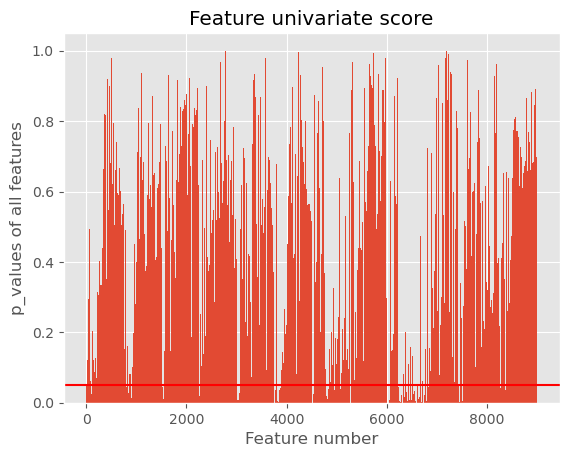

In [194]:
# selectKbest features 
selector = SelectKBest(f_classif, k=620)
selector.fit(X_train, y_train)
p_values = selector.pvalues_

# plot p-values of all features
X_indices = np.arange(X_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, p_values, width=1)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel('p_values of all features')
plt.show()

# Univariate method
# x_univar = SelectKBest(f_classif, k=10).fit_transform(x_train, y_train)  # welke k wil je? 
# print(x_univar.shape)

In [195]:
# select features with p_value =< 0.05
features_selected = np.array(np.where(p_values <= 0.05))
print(features_selected.shape)

# select significant features in training set
X_train = X_train[:,features_selected[0,:]]
print(X_train.shape)

(1, 1039)
(620, 1039)


Univariate


In [196]:
# univariate feature selection
# k = 1000 # number of top features to select
# selector = SelectKBest(f_classif, k=k)
# X_new = selector.fit_transform(X, y)
# selected_features = np.array(range(X.shape[1]))[selector.get_support()]

# X_new now contains only the k top features
# selected_features contains the indices of the selected features in the original X array

PCA
- How many principal components? (n=2/3) --> to make plots visual
- Scree plot to determine amount of features to use?


In [197]:
# Reduce the number of features with PCA.
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)

print(pca.n_components_)

# explained_variance_ratio = pca.explained_variance_ratio_

# plt.bar(np.arange(1, len(explained_variance_ratio)+1), explained_variance_ratio)
# plt.xlabel('Principal Component Index')
# plt.ylabel('Explained Variance Percentage')
# plt.show()

## Scree plot?
# p = PCA()
# p = p.fit(X_train)
# X_train = p.transform(X_train)
# print(X_train.shape)
# p.explained_variance_
# plt.style.use("ggplot") 
# plt.plot(p.explained_variance_, marker='o')
# plt.xlabel("Eigenvalue number")
# plt.ylabel("Eigenvalue size")
# plt.title("Scree Plot")

# assume X is your data matrix containing 827 patients and 9000 features
# pca = PCA()
# pca.fit(X_train)

# # generate scree plot
# plt.plot(np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 'o-')
# plt.xlabel('Principal component')
# plt.ylabel('Proportion of explained variance')
# plt.title('Scree plot')
# plt.show()


202


 Screeplot code

In [198]:
# pca = PCA()
# pca.fit_transform(X_train)

# #determine explained variance using explained_variance_rati_ attribute
# explained_variance_ratio = pca.explained_variance_ratio_

# # cumulative sum of eigenvalues; used to create step plot
# cum_sum_eigenvalues = np.cumsum(explained_variance_ratio)

# plt.bar(range(0, len(explained_variance_ratio)), explained_variance_ratio, alpha=0.5, align='center',
#         label='Individual explained variance')
# plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues,
#          where='mid', label='Cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()